# Image Classifier based on VGG16

##Dataset source: 

http://vision.stanford.edu/aditya86/ImageNetDogs/

Classifcation of dogs by their breed.
Number of classes: 120
Instances: 20,580

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import zipfile

from sklearn.model_selection import train_test_split

Ensure that the dataset is downloaded to your Google drive before executing following code.

In [6]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we have access to our Google Drive files so let us untar the folder including all images and save them in 'tmp' path:

In [7]:
!tar -xvf "/content/drive/MyDrive/images.tar" -C "/tmp"

Streaming output truncated to the last 5000 lines.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n

Checking number of classes

In [8]:
print('Number of breeds included in dataset:')
len(os.listdir('/tmp/Images')) 

Number of breeds included in dataset:


120


Print few images of a certain breed for our knowledge. 

In [9]:
os.listdir('/tmp/Images/n02085620-Chihuahua')[:10]

['n02085620_5927.jpg',
 'n02085620_3838.jpg',
 'n02085620_3409.jpg',
 'n02085620_3875.jpg',
 'n02085620_11948.jpg',
 'n02085620_5312.jpg',
 'n02085620_8637.jpg',
 'n02085620_2507.jpg',
 'n02085620_1298.jpg',
 'n02085620_4919.jpg']

We train the model only on 5 breed types - Chihuahua, Pekinese, German shepherd, Siberian husky and Boxer. 

In [10]:
def get_images(directory):
    Images = []
    Labels = []  
    labels = ['n02085620-Chihuahua','n02086079-Pekinese','n02106662-German_shepherd','n02110185-Siberian_husky','n02108089-boxer']
    #label = 0
              
    for label in labels:
      for image_file in os.listdir(os.path.join(directory, label)): 
        image = cv2.imread(os.path.join(directory, label)+'/'+image_file, cv2.IMREAD_COLOR)
        try:
          image = cv2.resize(image,(224,224), interpolation=cv2.INTER_CUBIC)
        except:
          continue
        Images.append(image)
        Labels.append(label)
    
    return Images, Labels

The following is a function we will define a dictionary useful to assign an integer value to each class: 

In [11]:
def get_classlabel(class_code):
    labels = {0:'n02085620-Chihuahua', 
              1:'n02086079-Pekinese', 
              2:'n02106662-German_shepherd', 
              3:'n02110185-Siberian_husky', 
              4:'n02108089-boxer'}
    
    return labels[class_code]

In [12]:
Images, Labels = get_images('/tmp/Images/') 

Images = np.array(Images) #Images to numpy array.
Labels = np.array(Labels)

We have to confirm the length of the Images list, thus we will add up the length of the five folders and see if it corresponds to the amount of images contained in Images.

In [13]:
len(os.listdir('/tmp/Images/n02085620-Chihuahua'))+len(os.listdir('/tmp/Images/n02086079-Pekinese'))+len(os.listdir('/tmp/Images/n02106662-German_shepherd'))+len(os.listdir('/tmp/Images/n02110185-Siberian_husky'))+len(os.listdir('/tmp/Images/n02108089-boxer'))

796

In [14]:
Images.shape, Labels.shape

((796, 224, 224, 3), (796,))

It's right!, just to confirm the unique values contained in Labels:

In [15]:
np.unique(Labels)

array(['n02085620-Chihuahua', 'n02086079-Pekinese',
       'n02106662-German_shepherd', 'n02108089-boxer',
       'n02110185-Siberian_husky'], dtype='<U25')

Perfect!, the images list contains 796 images sized 224x224, take into account that total number of images in dataset was was 20580. The height and width are proper, the last dimension corresponds to 3 channels (color image), whereas the label contains 796 instances corresponding to the class of the images.

In [16]:
Labels

array(['n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihuahua',
       'n02085620-Chihuahua', 'n02085620-Chihu

As the images were gathered from the folders, this process was made one by one, so the first n instances corresponds to the first folder 'n02085620-Chihuahua', the following m instances to the second folder 'n02086079-Pekinese' so on and so forth, therefore we have to shuffle them to be used in modeling:

In [17]:
from sklearn.utils import shuffle
Images,Labels = shuffle(Images,Labels,random_state=42)

In [18]:
Labels

array(['n02108089-boxer', 'n02108089-boxer', 'n02085620-Chihuahua',
       'n02110185-Siberian_husky', 'n02085620-Chihuahua',
       'n02108089-boxer', 'n02106662-German_shepherd', 'n02108089-boxer',
       'n02110185-Siberian_husky', 'n02110185-Siberian_husky',
       'n02085620-Chihuahua', 'n02086079-Pekinese',
       'n02110185-Siberian_husky', 'n02085620-Chihuahua',
       'n02106662-German_shepherd', 'n02106662-German_shepherd',
       'n02086079-Pekinese', 'n02110185-Siberian_husky',
       'n02108089-boxer', 'n02110185-Siberian_husky',
       'n02106662-German_shepherd', 'n02110185-Siberian_husky',
       'n02110185-Siberian_husky', 'n02108089-boxer',
       'n02110185-Siberian_husky', 'n02085620-Chihuahua',
       'n02086079-Pekinese', 'n02106662-German_shepherd',
       'n02110185-Siberian_husky', 'n02108089-boxer',
       'n02086079-Pekinese', 'n02085620-Chihuahua',
       'n02110185-Siberian_husky', 'n02110185-Siberian_husky',
       'n02085620-Chihuahua', 'n02085620-Chihuah

We need to set these classes to numerical values suitable to be used in model training, this is why we will replace the strings (classes) to classcode (0,1,2,3,4) similar to get_classlabel function.

In [19]:
Labels = np.where(Labels == 'n02085620-Chihuahua', 0, Labels)
Labels = np.where(Labels == 'n02086079-Pekinese', 1, Labels)
Labels = np.where(Labels == 'n02106662-German_shepherd', 2, Labels)
Labels = np.where(Labels == 'n02110185-Siberian_husky', 3, Labels)
Labels = np.where(Labels == 'n02108089-boxer', 4, Labels)

In [20]:
Labels = Labels.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [21]:
np.unique(Labels)

array([0, 1, 2, 3, 4])

Let us display some random images for all classes just to see them in more detail and have an idea how complex they are and what we have to consider when building the model.

In [22]:
def get_indexes(label,list_n):
  for x in range(len(Labels)):
    if Labels[x]==label:
      list_n.append(x)
  return list_n

In [23]:
Chihuahua=[]
Chihuahua=get_indexes(0,Chihuahua)
Pekinese=[]
Pekinese=get_indexes(1,Pekinese)
German_shepherd=[]
German_shepherd=get_indexes(2,German_shepherd)
Siberian_husky=[]
Siberian_husky=get_indexes(3,Siberian_husky)
Boxer=[]
Boxer=get_indexes(4,Boxer)

The following plots 3 random samples for each class:

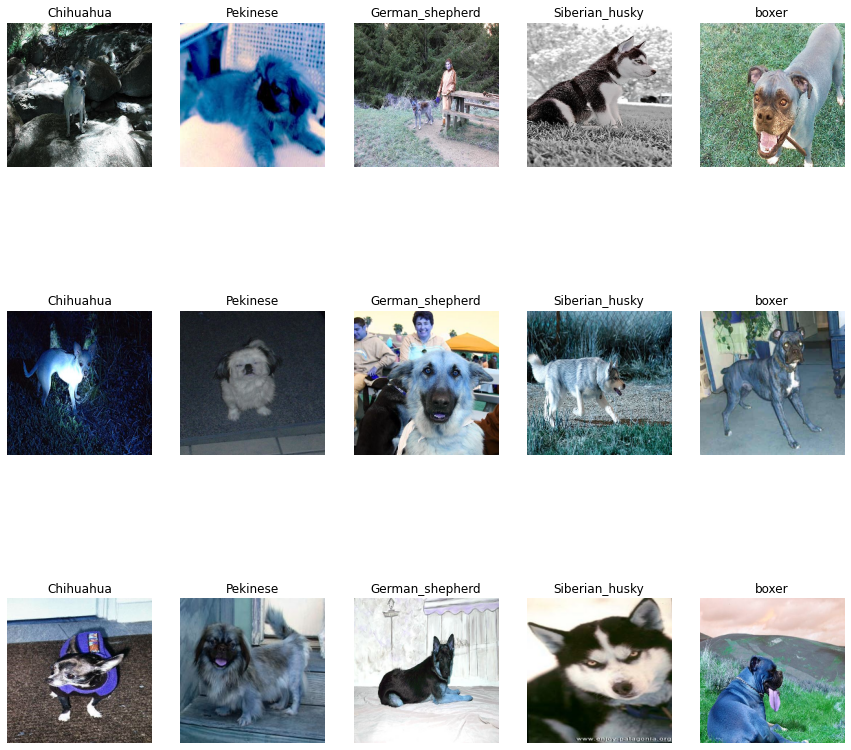

In [24]:
import random
from random import randint

f,ax = plt.subplots(3, 5, figsize=(15,15)) 
types_img=[Chihuahua,Pekinese,German_shepherd,Siberian_husky,Boxer]

for z in range(0,5,1):
  for j in range(0,3,1):
    rnd_number=random.choice(types_img[z])
    ax[j,z].imshow(Images[rnd_number])
    ax[j,z].set_title(get_classlabel(z).split('-')[1])
    ax[j,z].axis('off')

We can see the images look perfect, but something extremely important to consider is that some of them include multiple animals, objects, people and words, having all images in different positions and illumination, etc. This surely will limit the performance of our pre-trained model, because several images will require extra preprocessing or even a different approach.  

The next step is splitting into training and validation sets to be used in modeling process:

In [25]:
Images_train, Images_test, Labels_train, Labels_test = train_test_split(Images, Labels, test_size = 0.25)

In [26]:
Images_train.shape, Labels_train.shape, Images_test.shape, Labels_test.shape

((597, 224, 224, 3), (597,), (199, 224, 224, 3), (199,))

## Pre-trained VGG16.

This is a powerful, well-known and preffered pre-trained model and as we know it can use the weights learned from ImageNet and fortunately such image dataset contains all breeds of dogs comprehended in Stanford, because of this the task should have a relatively high performance in terms of accuracy, in order to increase it a bit more we will perform Image Augmentation to the training images and normalize both sets.

In [27]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In order to improve the performance of the models to build we can apply regularization techniques, one of them corresponds to Data Augmentation in which we add more variability to the training images by flipping horizontally, vertically, shifting, zooming, min-max scaling, etc. This can be achieved by detailing such characteristics in the arguments of the ImageDataGenerator function.

In [28]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.1,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False) 

val_datagen = ImageDataGenerator(rescale = 1.0/255)

In [29]:
train_datagen.fit(Images_train)
val_datagen.fit(Images_test)

Let's create two constraints or 'callbacks' which can help us improve the training (ReduceLROnPlateau) and stop the training once it has reached a high threshold (Callback):

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=1, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)

In [31]:
optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999) #<--- Best

## Model buiding

In [32]:
from tensorflow.keras.applications import VGG16

In [33]:
model_VGG=Sequential()
model_VGG.add(VGG16(input_shape=(224,224,3),
                    include_top=False,
                    pooling='max',
                    weights='imagenet'))

58900480/58889256 [==============================] - 0s 0us/step


In [34]:
model_VGG.layers[0].trainable=False

In [35]:
model_VGG.add(Dense(512,activation='relu'))
model_VGG.add(Dropout(0.1))
model_VGG.add(Dense(5,activation='softmax'))

In [36]:
model_VGG.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14,979,909
Trainable params: 265,221
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
model_VGG.layers

In [38]:
model_VGG.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
history3 = model_VGG.fit_generator(train_datagen.flow(Images_train, Labels_train, batch_size=32),
                                   validation_data=val_datagen.flow(Images_test, Labels_test, batch_size=128), 
                                   epochs=15, verbose=1,
                                   callbacks=[callbacks, lr_reduction])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
19/19 [==============================] - 39s 1s/step - loss: 1.6420 - accuracy: 0.3953 - val_loss: 0.9238 - val_accuracy: 0.6734 - lr: 0.0010
Epoch 2/15
19/19 [==============================] - 8s 421ms/step - loss: 0.9933 - accuracy: 0.5946 - val_loss: 0.7647 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 3/15
19/19 [==============================] - 8s 419ms/step - loss: 0.7830 - accuracy: 0.6851 - val_loss: 0.5649 - val_accuracy: 0.7789 - lr: 0.0010
Epoch 4/15
19/19 [==============================] - ETA: 0s - loss: 0.6773 - accuracy: 0.7504
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
19/19 [==============================] - 8s 415ms/step - loss: 0.6773 - accuracy: 0.7504 - val_loss: 0.6275 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 5/15
19/19 [==============================] - 8s 422ms/step - loss: 0.6240 - accuracy: 0.7588 - val_loss: 0.4941 - val_accuracy: 0.8141 - lr: 5.0000e-04
Epoch 6/15
19/19 [==============================] - 8s 414ms/ste

The model built took 1 minute and 30 seconds to train for 15 epochs, the train/test accuracies reached are 85%/75%. Let us print the 5 keys of the history variable as a pandas dataframe and then plot the error metrics:


In [40]:
pd.DataFrame(history3.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.641980,0.395310,0.923793,0.673367,0.001000
1,0.993320,0.594640,0.764682,0.678392,0.001000
2,0.783041,0.685092,0.564929,0.778894,0.001000
3,0.677320,0.750419,0.627508,0.768844,0.001000
4,0.624011,0.758794,0.494146,0.814070,0.000500
5,0.561199,0.802345,0.458157,0.834171,0.000500
6,0.536868,0.820771,0.472939,0.804020,0.000500
7,0.513033,0.820771,0.437475,0.814070,0.000250
8,0.486637,0.840871,0.461986,0.819095,0.000125
9,0.485779,0.820771,0.459898,0.809045,0.000063


accuracy metrics

In [41]:
def metrics_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1,len(acc)+1,1)

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

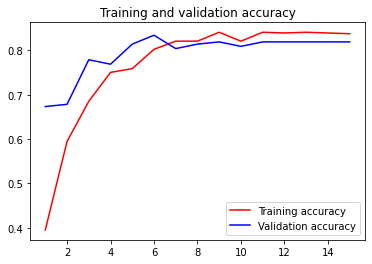

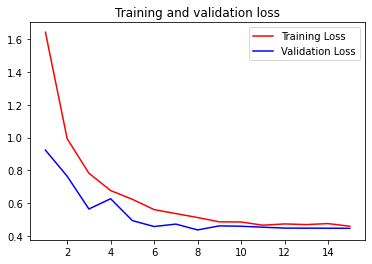

In [42]:
metrics_plot(history3)

In [43]:
predicted_test_VGG = model_VGG.predict(Images_test/255.0, batch_size=32)

In [44]:
predicted_test_VGG[:5]

array([[4.15966008e-03, 1.17267236e-01, 8.72965217e-01, 2.17294483e-03,
        3.43487156e-03],
       [3.39342058e-01, 5.46466596e-02, 2.69293021e-02, 1.76742990e-02,
        5.61407745e-01],
       [1.04434425e-02, 1.36767803e-02, 6.29782677e-01, 6.04397850e-04,
        3.45492691e-01],
       [3.20599556e-01, 4.16238397e-01, 7.21323267e-02, 1.72575653e-01,
        1.84540749e-02],
       [5.47476159e-03, 5.75917661e-01, 4.03854877e-01, 1.81616473e-04,
        1.45710958e-02]], dtype=float32)

In [45]:
class_pred_VGG = [np.argmax(i) for i in predicted_test_VGG]
print(class_pred_VGG[:5])

[2, 4, 2, 1, 1]


In [46]:
Labels_test[:5]

array([2, 4, 4, 1, 1])

classification report

In [47]:
from sklearn.metrics import classification_report

report = classification_report(Labels_test, class_pred_VGG)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.86      0.81      0.83        37
           2       0.69      0.79      0.74        34
           3       0.89      0.79      0.84        42
           4       0.83      0.91      0.87        44

    accuracy                           0.82       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.82      0.82      0.82       199



confusion matrix

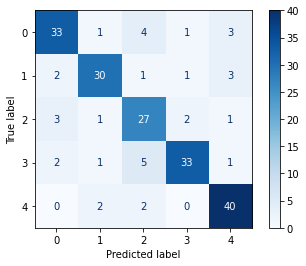

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Labels_test, class_pred_VGG), display_labels=np.unique(Labels_test))
disp.plot(cmap='Blues') 
plt.grid(False)

## Inference:

In order to make this process a bit easier we will define a function which converts the image loaded to the proper size, dimensions and prints the class predicted followed with the image.

In [49]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array

def infer_class(filename , model):
  labels = {0:'Chihuahua',
            1:'Pekinese', 
            2:'German_shepherd', 
            3:'Siberian_husky', 
            4:'Boxer'}

  image = cv2.imread(filename, cv2.IMREAD_COLOR)
  image = cv2.resize(image, (224,224), interpolation=cv2.INTER_CUBIC) 
  image = np.array(image)
  image = image.astype('float32')
  image = image/255.0

  result = model.predict(np.expand_dims(image, axis=0))

  class_result = np.argmax(result)

  print("The class predicted for the given image is: ", labels[int(class_result)],'\n',
        'The probability of such prediction is: ', result[0][class_result])
  plt.imshow(image)

The following lines of code have as purpose the load of the unseen images from a github repository, save as jpg format in content folder and call the function just defined to predict the class:

In [50]:
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/german.jpg"

--2022-09-12 07:47:28--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/german.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5148 (5.0K) [image/jpeg]
Saving to: ‘german.jpg’

german.jpg          100%[===================>]   5.03K  --.-KB/s    in 0s      

2022-09-12 07:47:28 (71.8 MB/s) - ‘german.jpg’ saved [5148/5148]



In [51]:
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/boxer.jpg"

--2022-09-12 07:47:28--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/boxer.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7263 (7.1K) [image/jpeg]
Saving to: ‘boxer.jpg’

boxer.jpg           100%[===================>]   7.09K  --.-KB/s    in 0s      

2022-09-12 07:47:28 (79.5 MB/s) - ‘boxer.jpg’ saved [7263/7263]



In [52]:
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/pekinese.jpg"

--2022-09-12 07:47:28--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/pekinese.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8298 (8.1K) [image/jpeg]
Saving to: ‘pekinese.jpg’

pekinese.jpg        100%[===================>]   8.10K  --.-KB/s    in 0s      

2022-09-12 07:47:28 (57.9 MB/s) - ‘pekinese.jpg’ saved [8298/8298]



The class predicted for the given image is:  German_shepherd 
 The probability of such prediction is:  0.99692494


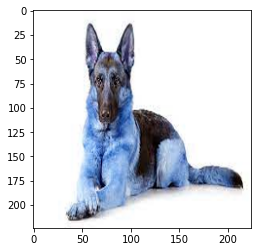

In [53]:
infer_class("/content/german.jpg" , model_VGG)

The class predicted for the given image is:  Boxer 
 The probability of such prediction is:  0.99096656


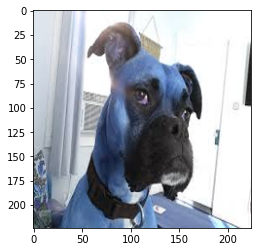

In [54]:
infer_class("/content/boxer.jpg" , model_VGG)

The class predicted for the given image is:  Pekinese 
 The probability of such prediction is:  0.99376535


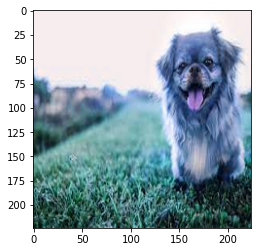

In [55]:
infer_class("/content/pekinese.jpg" , model_VGG)

For the above images the model classified them correctly with high confidence.